
# **Lab #1: การจัดการข้อมูลพื้นฐาน**
## **วัตถุประสงค์**
1. เรียนรู้การใช้งาน Python เบื้องต้นสำหรับการจัดการข้อมูล
2. เรียนรู้การใช้ไลบรารีสำคัญ เช่น Pandas และ GeoPandas
3. เรียนรู้การอ่าน/เขียนและสำรวจข้อมูลทางภูมิศาสตร์ (GeoData)

---
หมายเหตุ บางครั้งอาจจะเจอ Bug. ขอจงอย่าย่อท้อ ให้ใช้ทรัพยากรที่มีอยู่ในการจัดการแก้ไขปัญหา เช่น  Gemini หรือ ChatGPT แต่ทั้งนี้ต้องทำความเข้าใจกับคำตอบที่ได้ เพราะบางครั้ง AI ก็ให้คำตอบแบบงงๆ



## **1. การเริ่มต้นใช้งาน Google Colab**
### **1.1 เชื่อมต่อ Google Drive**
ก่อนอื่น ให้เชื่อมต่อ Google Drive เพื่อจัดเก็บข้อมูลของคุณ
    

In [134]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



### **1.2 ติดตั้งไลบรารีที่จำเป็น**
ติดตั้งไลบรารีที่จำเป็นสำหรับการจัดการข้อมูลและการวิเคราะห์ข้อมูลภูมิศาสตร์
    

In [135]:

!pip install pandas geopandas matplotlib



## **2. การจัดการข้อมูลตารางด้วย Pandas**
### **2.1 สร้าง DataFrame ตัวอย่าง**
ลองสร้าง DataFrame ข้อมูลประชากรของประเทศในภูมิภาค ASEAN
    

In [136]:
import pandas as pd

# สร้าง DataFrame ตัวอย่าง
data = {
    'ประเทศ': ['ไทย', 'ลาว', 'กัมพูชา', 'เวียดนาม','อินโดนีเซีย','บรูไน','ฟิลิปปินส์','มาเลเซีย','พม่า','สิงคโปร์','ติมอร์-เลสเต'],
    'ประชากร (ล้าน)': [69.8, 7.1, 16.5, 97.3, 286.6, 0.4, 119.1, 34.5, 54.8, 6.11,1.4],
    'พื้นที่ (ตร.กม.)': [513120, 236800, 181035, 331210, 1904569, 5765, 300000, 330877, 676578, 736,14874]
}
df = pd.DataFrame(data)

# แสดงข้อมูล
print(df)

# คำนวณความหนาแน่นประชากร
df['ความหนาแน่นประชากร (คน/ตร.กม.)'] = df['ประชากร (ล้าน)'] * 1_000_000 / df['พื้นที่ (ตร.กม.)']
print(df)

          ประเทศ  ประชากร (ล้าน)  พื้นที่ (ตร.กม.)
0            ไทย           69.80            513120
1            ลาว            7.10            236800
2        กัมพูชา           16.50            181035
3       เวียดนาม           97.30            331210
4    อินโดนีเซีย          286.60           1904569
5          บรูไน            0.40              5765
6     ฟิลิปปินส์          119.10            300000
7       มาเลเซีย           34.50            330877
8           พม่า           54.80            676578
9       สิงคโปร์            6.11               736
10  ติมอร์-เลสเต            1.40             14874
          ประเทศ  ประชากร (ล้าน)  พื้นที่ (ตร.กม.)  \
0            ไทย           69.80            513120   
1            ลาว            7.10            236800   
2        กัมพูชา           16.50            181035   
3       เวียดนาม           97.30            331210   
4    อินโดนีเซีย          286.60           1904569   
5          บรูไน            0.40              5765   
6     ฟิลิ


### **2.2 การอ่านไฟล์ข้อมูล CSV**
- ให้นักศึกษาหาข้อมูลที่น่าสนใจในรูปแบบ  CSV
- โหลด File .csv เข้า google drive ของนักศึกษา
- จากนั้นให้ไปดูใน file_path ในรูป โฟลเดอร์ ด้านซ้ายบน
    

In [137]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [138]:
import pandas as pd # Import the pandas library

# ตัวอย่างการอ่านไฟล์ CSV
file_path = '/content/drive/MyDrive/GE234_Lab01/data.csv'
geo_df = pd.read_csv(file_path)

# ตรวจสอบข้อมูล
print(geo_df.head())
print(geo_df.info())

   Year Phuket visitor Phuket Revenue (m baht)
0  1988        884,293                     NaN
1  1989        971,683                6,705.89
2  1990      1,254,215                8,574.27
3  1991      1,208,594               10,699.99
4  1992      1,633,496               33,891.17
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Year                     37 non-null     int64 
 1   Phuket visitor           37 non-null     object
 2   Phuket Revenue (m baht)  36 non-null     object
dtypes: int64(1), object(2)
memory usage: 1020.0+ bytes
None


**ตอบคำถาม 5 คะแนน**

จงใช้สันชาตญาณนักภูมิศาสตร์ อธิบายข้อมูลที่ได้ ว่าเป็นข้อมูลเกี่ยวกับอะไร

**ตอบ** ข้อมูลที่ได้เป็นข้อมูลเกี่ยวกับแนวโน้มการท่องเที่ยวของจังหวัดภูเก็ต มีองค์ประกอบของข้อมูลดังนี้
1.Year(ปี) โดยมีข้อมูลตั้งแต่ปี 1988
2.Phuket visitor (จำนวนนักท่องเที่ยวภูเก็ต) เป็นข้อมูลที่บ่งบอกถึงอุตสาหกรรมการท่องเที่ยวของจังหวัดภูเก็ต
3.Phuket Revenue (m bath) (รายได้จากการท่องเที่ยวภูเก็ต หน่วยเป็นล้านบาท) เป็นข้อมูลที่บ่งบอกถึงผลกระทบทางเศรษฐกิจของการท่องเที่ยวในจังหวัดภูเก็ต

โดยจากข้อมูลสามารถวิเคราะห์ได้ว่ามีนักท่องเที่ยวเพิ่มขึ้นทุกปี มีรายได้มากขึ้น แต่อาจะส่งผลกระทบด้านการใช้ที่ดินได้ในอนาคต เช่น การขยายโรงแรม,สนามบิน


## **3. การจัดการข้อมูลภูมิศาสตร์ด้วย GeoPandas** 5 คะแนน
### **3.1 การอ่าน Shapefile และแสดงผล**
ใช้ข้อมูล Shapefile ที่มีขอบเขตและมีประชากร อาจจะหาจากแหล่งข้อมูลที่ เป็น Opendata เช่น
https://data.humdata.org/dataset/worldpop-population-density-for-thailand

    

                  adm1_name       adm1_name1 adm1_name2 adm1_name3 adm1_pcode  \
0                   Bangkok    กรุงเทพมหานคร       None       None       TH10   
1              Samut Prakan      สมุทรปราการ       None       None       TH11   
2                Nonthaburi          นนทบุรี       None       None       TH12   
3              Pathum Thani         ปทุมธานี       None       None       TH13   
4  Phra Nakhon Si Ayutthaya  พระนครศรีอยุธยา       None       None       TH14   

  adm0_name adm0_name1 adm0_name2 adm0_name3 adm0_pcode  ...    area_sqkm  \
0  Thailand  ประเทศไทย       None       None         TH  ...  1571.371348   
1  Thailand  ประเทศไทย       None       None         TH  ...   949.001112   
2  Thailand  ประเทศไทย       None       None         TH  ...   636.542913   
3  Thailand  ประเทศไทย       None       None         TH  ...  1517.386644   
4  Thailand  ประเทศไทย       None       None         TH  ...  2553.360953   

  version  lang lang1 lang2 lang3                a

<Axes: >

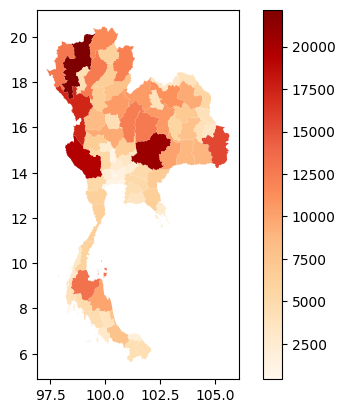

In [139]:
import geopandas as gpd

# อ่านไฟล์ Shapefile และระบุ layer 'tha_admin1'
shapefile_path = '/content/drive/MyDrive/GE234_Lab01/tha_admin_boundaries'
geo_data = gpd.read_file(shapefile_path, layer='tha_admin1')

# แสดงข้อมูลเบื้องต้น
print(geo_data.head())
print(geo_data.crs)

# แสดงผลข้อมูลบนแผนที่ โดยใช้คอลัมน์ 'area_sqkm'
geo_data.plot(column='area_sqkm', cmap='OrRd', legend=True)


## **4. การแสดงผลข้อมูล**
### **4.1 สร้างกราฟด้วย Matplotlib**  5 คะแนน
สร้างกราฟแสดงประชากรของแต่ละประเทศในภูมิภาค ASEAN โดยให้นักศึกษาทดลองหาข้อมูลเอง
    

   population      country     density cca3 cca2     area
0   287887000    Indonesia  151.155983  IDN   ID  1904569
1   117724000  Philippines  343.867295  PHL   PH   342353
2   102177000      Vietnam  308.494257  VNM   VN   331212
3    71559600     Thailand  139.459775  THA   TH   513120
4    55184800      Myanmar   81.564579  MMR   MM   676578
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  11 non-null     int64  
 1   country     11 non-null     object 
 2   density     11 non-null     float64
 3   cca3        11 non-null     object 
 4   cca2        11 non-null     object 
 5   area        11 non-null     int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 660.0+ bytes
None
Matplotlib font configuration updated.
    population      country      density cca3 cca2     area
0    287887000    Indonesia   151.155983  IDN   ID 

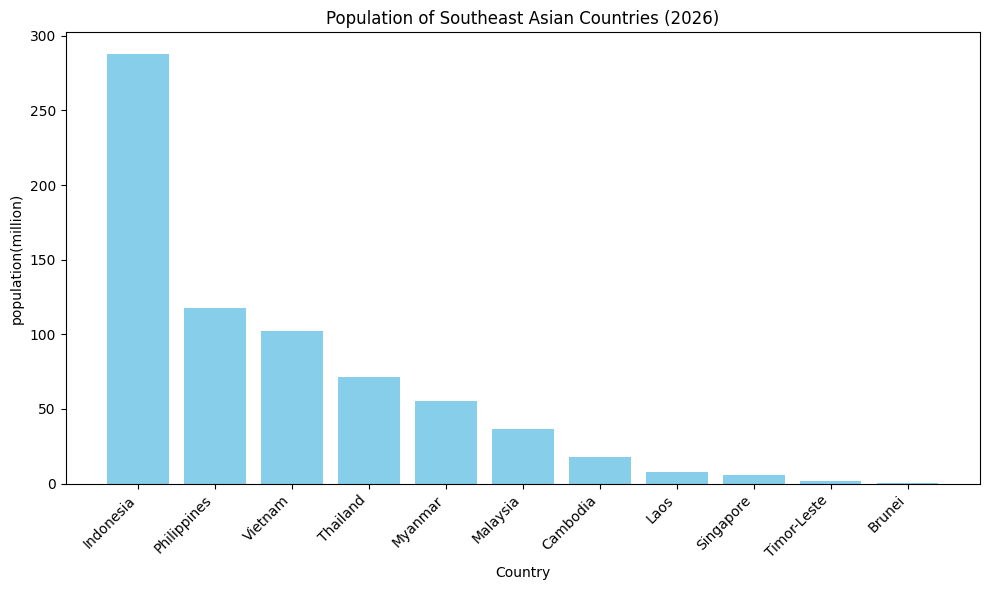

In [140]:
import pandas as pd # Import the pandas library
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

file_path = '/content/drive/MyDrive/GE234_Lab01/southeast-asia-population-2026.csv'
geo_df = pd.read_csv(file_path)

print(geo_df.head())
print(geo_df.info())

# Set a default font family that is usually available in Colab
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

plt.rcParams['axes.unicode_minus'] = False

print("Matplotlib font configuration updated.")

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the DataFrame
print(geo_df)

pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

plt.figure(figsize=(10, 6))
plt.bar(geo_df['country'], geo_df['population'] / 1_000_000, color='skyblue')
plt.title('Population of Southeast Asian Countries (2026)')
plt.xlabel('Country')
plt.ylabel('population(million)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### **4.2 การรวมข้อมูลเชิงพื้นที่และตาราง**
รวมข้อมูล Shapefile กับข้อมูลประชากรเพื่อแสดงข้อมูลประชากรในแต่ละจังหวัด โดยให้นักศึกษาทดลองหาข้อมูลเอง
    

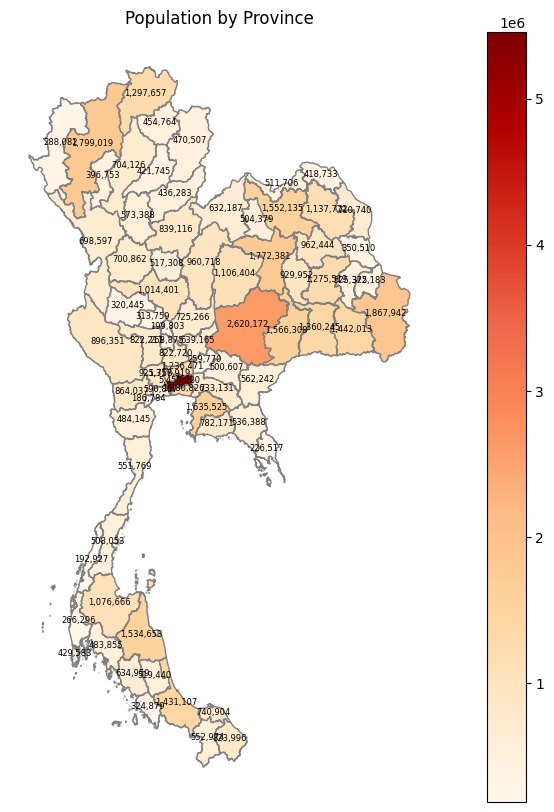

In [156]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# 1. โหลดข้อมูล
geo_data = gpd.read_file('/content/drive/MyDrive/GE234_Lab01/ประชากร')
df = pd.read_csv('/content/drive/MyDrive/GE234_Lab01/ประชากร/stat_c2567.csv')

# 4. Merge
merged_data = geo_data.merge(df, left_on='adm1_name1', right_on='ชื่อ', how='left')

if 'จำนวนประชากรทั้งหมด' in merged_data.columns:
    # ลบเครื่องหมายจุลภาคออกก่อนแปลงเป็นตัวเลข
    merged_data['จำนวนประชากรทั้งหมด'] = merged_data['จำนวนประชากรทั้งหมด'].astype(str).str.replace(',', '', regex=False)
    # แปลงเป็น int (หรือ float หากมีทศนิยม)
    merged_data['จำนวนประชากรทั้งหมด'] = pd.to_numeric(merged_data['จำนวนประชากรทั้งหมด'], errors='coerce').fillna(0).astype(int)


# 4. แสดงผล
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data.plot(column='จำนวนประชากรทั้งหมด',
                 cmap='OrRd',
                 legend=True,
                 edgecolor='0.5', # ใส่เส้นขอบจังหวัดให้ชัดขึ้น
                 ax=ax)

# 5. เพิ่มตัวเลขประชากรลงในพื้นที่จังหวัด
for idx, row in merged_data.iterrows():
    centroid = row['geometry'].centroid
    ax.annotate(text=f"{row['จำนวนประชากรทั้งหมด']:,}",
                xy=(centroid.x, centroid.y),
                horizontalalignment='center',
                fontsize=6,
                color='black')

plt.title('Population by Province')
plt.axis('off') # ปิดแกน x, y เพื่อความสวยงาม
plt.show()


## **โจทย์สำหรับนักศึกษา** 15 คะแนน
1. ลองเพิ่มประเทศใหม่ใน DataFrame พร้อมคำนวณความหนาแน่นประชากร (5 คะแนน)
2. นำไฟล์ Shapefile ของพื้นที่อื่นมาแสดงผลใน GeoPandas (5 คะแนน)
3. ลองสร้างแผนที่ด้วยสีที่แตกต่างกันโดยใช้ค่าอื่น เช่น `area` หรือ `density` (5 คะแนน)

---

### **หมายเหตุ**
- ดาวน์โหลดข้อมูลจากแหล่ง Open Data เช่น [World Bank Open Data](https://data.worldbank.org) หรือ [Thailand Data Catalog](https://data.go.th)
- ใส่เครดิตแหล่งข้อมูลในรายงานของคุณ
    

แหล่งที่มาของข้อมูล : https://data.humdata.org/dataset/volcano-population-exposure-index-gvm

https://worldpopulationreview.com/continents/southeast-asia

https://gis.nso.go.th/?page_id=3883

# 1.ลองเพิ่มประเทศใหม่ใน DataFrame พร้อมคำนวณความหนาแน่นประชากร

In [ ]:


import pandas as pd

# สร้าง DataFrame ตัวอย่าง พร้อมเพิ่มประเทศญี่ปุ่น
data = {
    'ประเทศ': ['ไทย', 'ลาว', 'กัมพูชา', 'เวียดนาม','อินโดนีเซีย','บรูไน','ฟิลิปปินส์','มาเลเซีย','พม่า','สิงคโปร์','ติมอร์-เลสเต', 'ญี่ปุ่น'],
    'ประชากร (ล้าน)': [69.8, 7.1, 16.5, 97.3, 286.6, 0.4, 119.1, 34.5, 54.8, 6.11, 1.4, 125.7],
    'พื้นที่ (ตร.กม.)': [513120, 236800, 181035, 331210, 1904569, 5765, 300000, 330877, 676578, 736, 14874, 377975]
}
df = pd.DataFrame(data)

# แสดงข้อมูล
print(df)

# คำนวณความหนาแน่นประชากร
df['ความหนาแน่นประชากร (คน/ตร.กม.)'] = df['ประชากร (ล้าน)'] * 1_000_000 / df['พื้นที่ (ตร.กม.)']
print(df)

          ประเทศ  ประชากร (ล้าน)  พื้นที่ (ตร.กม.)
0            ไทย           69.80            513120
1            ลาว            7.10            236800
2        กัมพูชา           16.50            181035
3       เวียดนาม           97.30            331210
4    อินโดนีเซีย          286.60           1904569
5          บรูไน            0.40              5765
6     ฟิลิปปินส์          119.10            300000
7       มาเลเซีย           34.50            330877
8           พม่า           54.80            676578
9       สิงคโปร์            6.11               736
10  ติมอร์-เลสเต            1.40             14874
11       ญี่ปุ่น          125.70            377975
          ประเทศ  ประชากร (ล้าน)  พื้นที่ (ตร.กม.)  \
0            ไทย           69.80            513120   
1            ลาว            7.10            236800   
2        กัมพูชา           16.50            181035   
3       เวียดนาม           97.30            331210   
4    อินโดนีเซีย          286.60           1904569   
5          บร

# 2. นำไฟล์ Shapefile ของพื้นที่อื่นมาแสดงผลใน GeoPandas


   VolcanoID                     V_Name  Country                    Region  \
0     210010  West Eifel Volcanic Field  Germany  Mediterranean and W Asia   
1     210020            Cha?ne des Puys   France  Mediterranean and W Asia   
2     210030        Olot Volcanic Field    Spain  Mediterranean and W Asia   
3     210040   Calatrava Volcanic Field    Spain  Mediterranean and W Asia   
4     211001                 Larderello    Italy  Mediterranean and W Asia   

        Subregion  Latitude  Longitude  PEI  H_active              VEI_Holoce  \
0  Western Europe    50.170       6.85    6         0             Unknown VEI   
1  Western Europe    45.775       2.97    7         0             Unknown VEI   
2  Western Europe    42.170       2.53    5         0  No confirmed eruptions   
3  Western Europe    38.870      -4.02    6         0             Unknown VEI   
4           Italy    43.250      10.87    4         0                       3   

  hazard   class  risk field_14 field_15    

<Axes: >

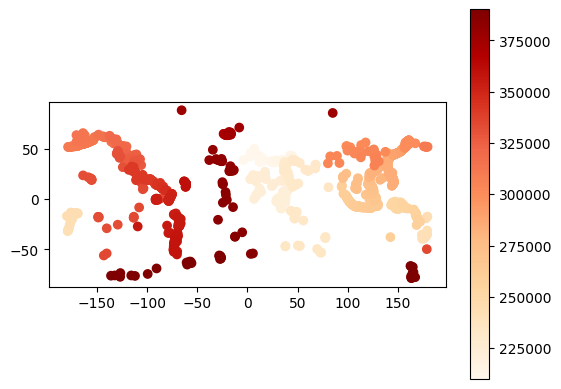

In [ ]:

import geopandas as gpd

# อ่านไฟล์ Shapefile
shapefile_path = '/content/drive/MyDrive/GE234_Lab01/volcano.shp'
geo_data = gpd.read_file(shapefile_path)

# แสดงข้อมูลเบื้องต้น
print(geo_data.head())
print(geo_data.crs)

# แสดงผลข้อมูลบนแผนที่ โดยใช้คอลัมน์ 'VolcanoID' แทน 'population'
# เนื่องจากคอลัมน์ 'population' ไม่มีอยู่ใน GeoDataFrame นี้
geo_data.plot(column='VolcanoID', cmap='OrRd', legend=True)

# 3. ลองสร้างแผนที่ด้วยสีที่แตกต่างกันโดยใช้ค่า area

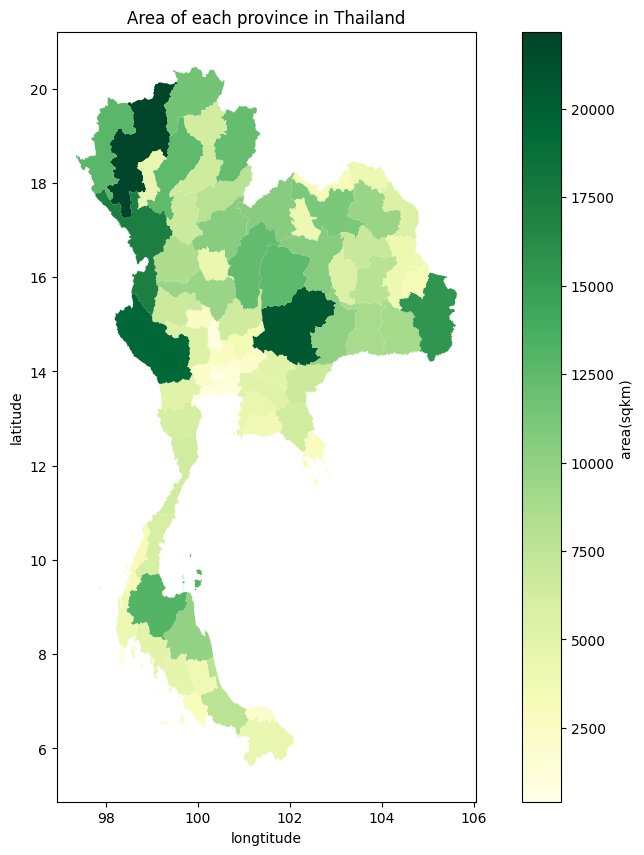

In [ ]:

import matplotlib.pyplot as plt

# แสดงผลข้อมูลบนแผนที่ โดยใช้คอลัมน์ 'area_sqkm'
# ใช้ merged_data ที่สร้างและรวมข้อมูลไว้แล้วในเซลล์ J_xUrbYIrzLh
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged_data.plot(column='area_sqkm', cmap='YlGn', legend=True, ax=ax,
                     legend_kwds={'label': 'area(sqkm) ', 'orientation': 'vertical'})

plt.title('Area of ​​each province in Thailand')
plt.xlabel('longtitude')
plt.ylabel('latitude')
plt.show()

# 3. ลองสร้างแผนที่ด้วยสีที่แตกต่างกันโดยใช้ค่า density

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-thai-tlwg is already the newest version (1:0.7.3-1).
0 upgraded, 0 newly installed, 0 to remove and 2 not upgraded.
Matplotlib font configuration updated to support Thai characters.


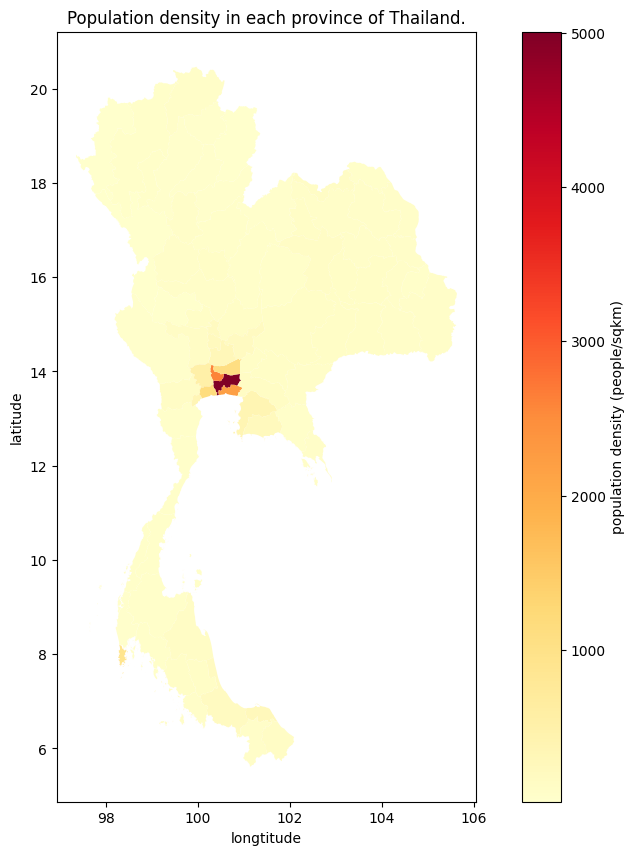

In [ ]:

# 1. ติดตั้งฟอนต์ภาษาไทย
!sudo apt-get install fonts-thai-tlwg

# 2. ลบแคชฟอนต์ของ Matplotlib เพื่อให้ตรวจพบฟอนต์ใหม่
# import matplotlib.font_manager as fm
# fm._rebuild() # Removed as it causes AttributeError

# 3. กำหนดค่า Matplotlib ให้ใช้ฟอนต์ภาษาไทย
# ลองใช้ 'TH Sarabun New' หรือ 'Kanit' ซึ่งมักจะมีอยู่ใน Colab หลังติดตั้ง
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'TH Sarabun New' # หรือลองใช้ 'Kanit'
plt.rcParams['font.sans-serif'] = ['TH Sarabun New', 'DejaVu Sans'] # เพิ่ม DejaVu Sans เป็น fallback
plt.rcParams['axes.unicode_minus'] = False # เพื่อให้เครื่องหมายลบแสดงผลได้ถูกต้อง

print("Matplotlib font configuration updated to support Thai characters.")

# แสดงผลข้อมูลบนแผนที่ โดยใช้คอลัมน์ 'Density (คน/ตร.กม.)' (ชื่อคอลัมน์ที่ถูกต้อง)
# ใช้ merged_data ที่สร้างและรวมข้อมูลไว้แล้วในเซลล์ J_xUrbYIrzLh
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged_data.plot(column='Density (คน/ตร.กม.)', cmap='YlOrRd', legend=True, ax=ax,
                     legend_kwds={'label': 'population density (people/sqkm)', 'orientation': 'vertical'})

plt.title('Population density in each province of Thailand.')
plt.xlabel('longtitude')
plt.ylabel('latitude')
plt.show()